### Introduction:
Football is loved by all and its beauty lies in its Unpredictable nature. One thing which is strongly associated with this game is its fans, brooding and debating before a game over who will win the game. And some fans even go to the limit of speculating the scoreline before the match. So let`s try to answer some of these questions logically.

Well as I have said earlier football is an unpredictable game, a goal can occur at any moment in the match totally random having no dependencies on previous goals or teams or any other factors. Wait did I say “Random”. Because there is a distribution in statistics that is used for finding the probabilities of randomly occurring events, Poisson Distribution.

Suppose your friend says that on average 2 goals happen per game, well, is he right? If right then what are the actual chances of seeing two goals in a match? Here comes to our rescue Poisson distribution helping us to find the probability of observing ‘n’ events (read ‘n’ goals) in a fixed time period given that we provide it with the expectation of events occurring (average events per time period).

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats 

In [2]:
# Read the Datafile of Football & view first 5 observations.
data=pd.read_csv('Football.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
# Let's check the count of features & datapoints we have in the dataset
print('Number of Features: ',data.shape[1])
print('Number of observations: ', data.shape[0])

Number of Features:  9
Number of observations:  41640


In [4]:
# Let's create a column with total goals scored by both teams
data['Total_Goals']=data['home_score'] + data['away_score']

In [8]:
data['date_year']=data['date'].apply(lambda x : int(str.split(x,'-')[0]))

In [18]:
final_data=data[data['date_year']>=2020]
final_data.shape

(61, 11)

In [19]:
data['Total_Goals'].mean()

2.932492795389049

In [21]:
LAMBDA=final_data['Total_Goals'].mean()
print(LAMBDA)

2.262295081967213


In [23]:
# Probability of 3 goals in a match:
stats.poisson.pmf(3, LAMBDA, loc=0)

0.20090661351941239

In [24]:
final_data['Total_Goals'].value_counts()

1    20
2    17
3     8
5     6
0     4
6     3
4     3
Name: Total_Goals, dtype: int64

In [25]:
k=np.arange(0,7)
PMF=stats.poisson.pmf(k, LAMBDA)
print(PMF)

[0.10411127 0.23553041 0.26641964 0.20090661 0.11362751 0.05141179
 0.01938477]


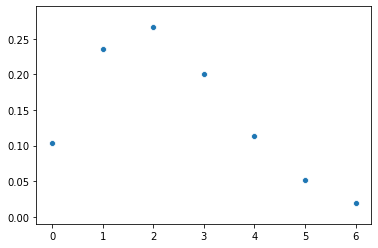

In [29]:
sns.scatterplot(x=k, y=PMF, markers='-*')
plt.show()